In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
df1=pd.read_csv("Compact.csv")
df2=pd.read_csv("Skewed.csv")
df3=pd.read_csv("Subclusters.csv")
df4=pd.read_csv("wellSeperated.csv")


In [59]:
df_names=["Compact","Skewed","SubClusters","wellSeperated"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      925 non-null    float64
 1   x2      925 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      335 non-null    float64
 1   x2      335 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


### for all datasets,making a scatter plot for x1 vs x2

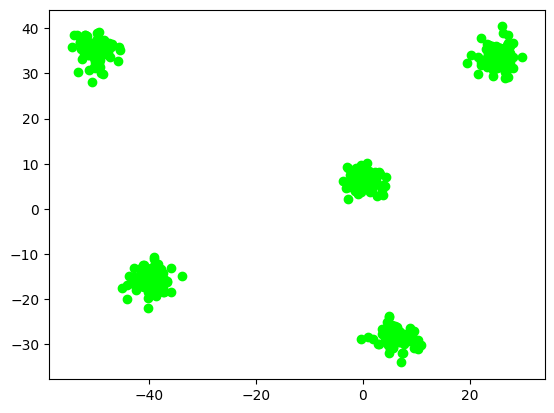

In [63]:
plt.scatter(df1["x1"], df1["x2"], c='lime')

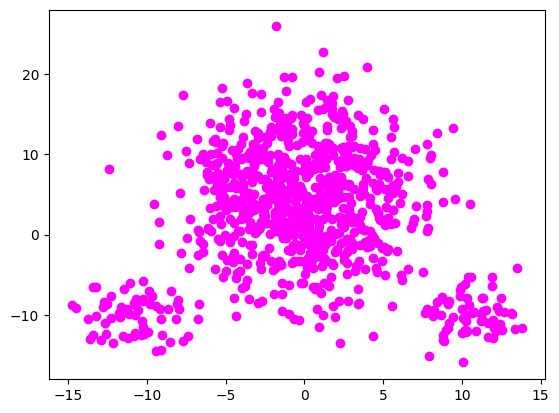

In [64]:
plt.scatter(df2["x1"], df2["x2"], c='magenta')


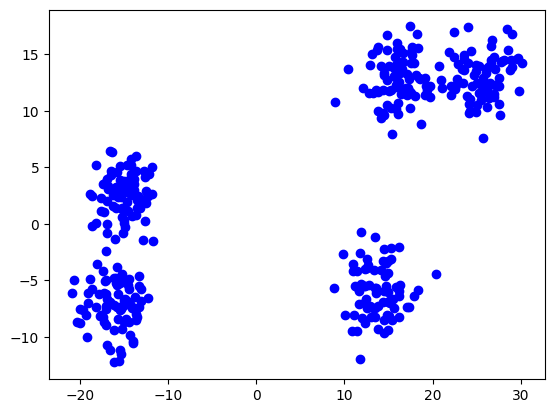

In [65]:
plt.scatter(df3["x1"], df3["x2"], c='blue')


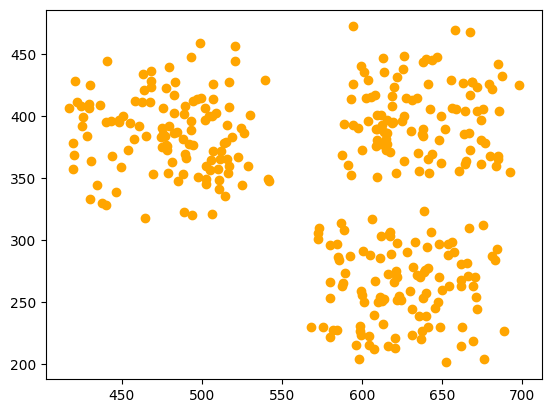

In [66]:
plt.scatter(df4["x1"], df4["x2"], c='orange')

## K-means clustering

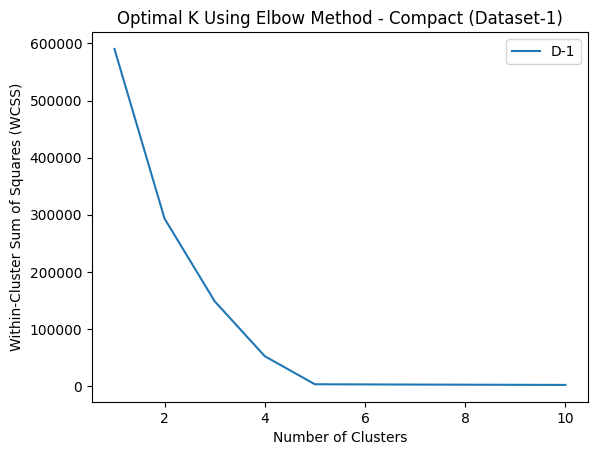

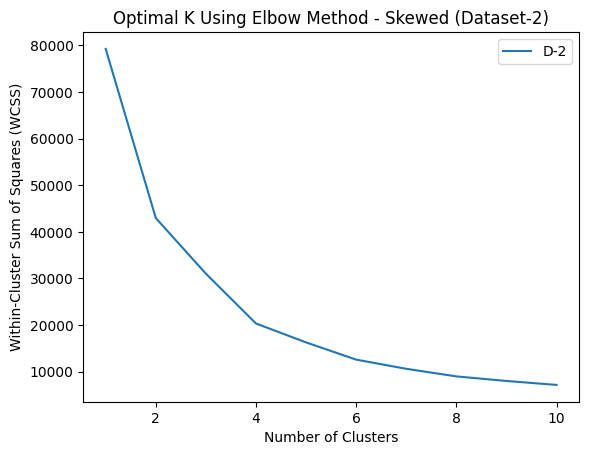

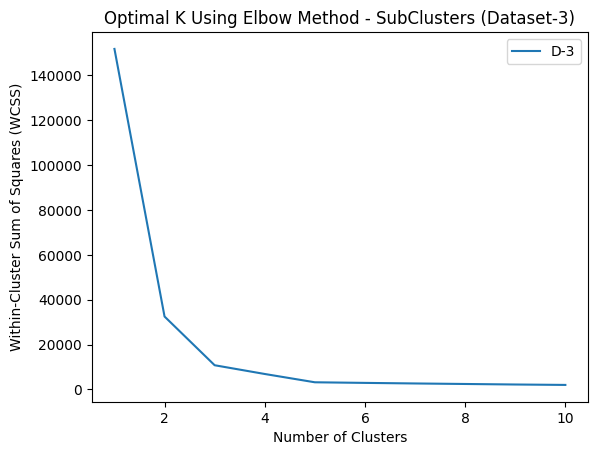

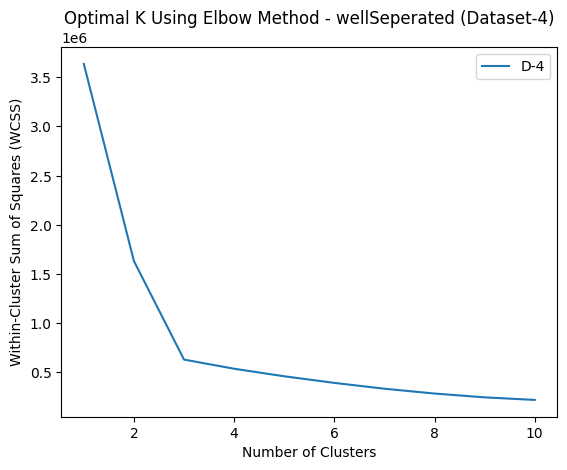

In [67]:
datasets = [df1, df2, df3, df4]

for index, df in enumerate(datasets, start=1):
    # Check if the dataset has numeric columns
    numeric_data = df.select_dtypes(include=[np.number])
    if not numeric_data.empty:
        # Initialize list to store within-cluster sum of squares
        inertia_values = []
        
        # Iterate over possible cluster counts
        for cluster_count in range(1, 11):
            # Configure and fit the KMeans model
            kmeans_model = KMeans(
                n_clusters=cluster_count,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0
            )
            kmeans_model.fit(numeric_data)
            
            # Record the inertia (within-cluster sum of squares)
            inertia_values.append(kmeans_model.inertia_)
        
        # Plot the Elbow graph to determine optimal number of clusters
        plt.plot(range(1, 11), inertia_values, label=f'D-{index}')
        plt.title(f'Optimal K Using Elbow Method - {df_names[index-1]} (Dataset-{index})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
        plt.legend()
        plt.show()
    
    # If no numeric columns are found
    else:
        print(f"Dataset {index} contains non-numeric columns and is not suitable for clustering.")


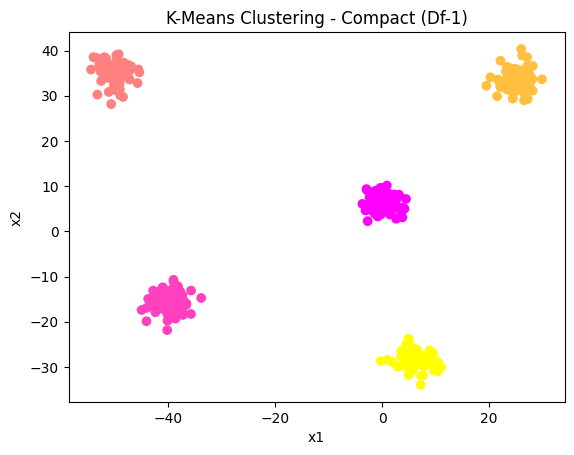

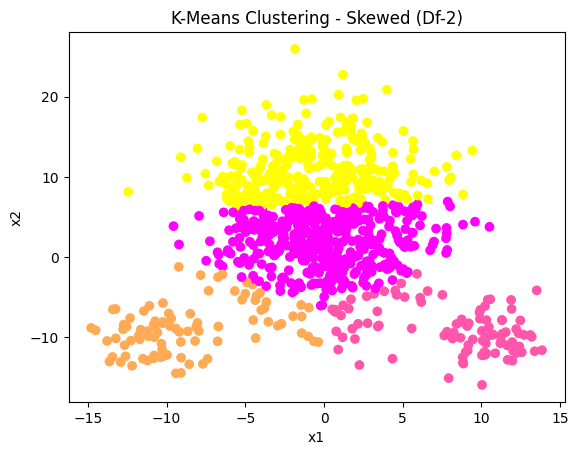

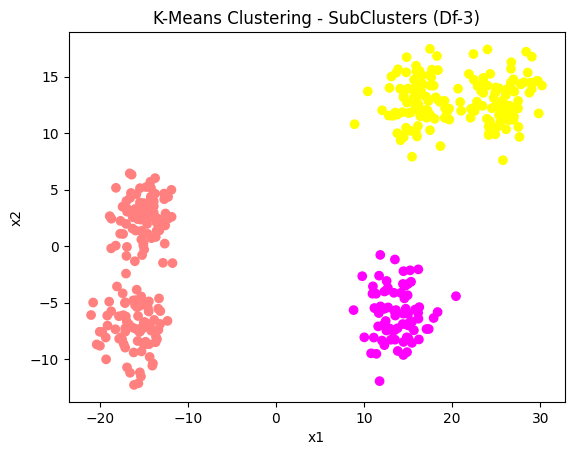

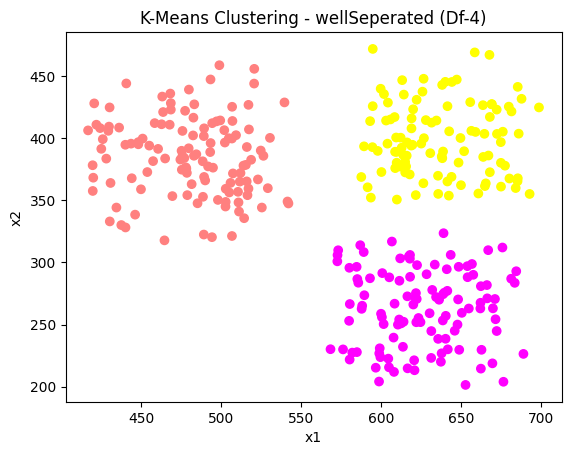

Silhouette Scores: [0.911779955803382, 0.4065104492214687, 0.738949032645643, 0.6139458447924039]
Inertia Scores: [3163.693807553345, 20328.527705310225, 10795.396187238295, 629926.6140455473]


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Optimal number of clusters for each dataset
optimal_cluster_counts = [5, 4, 3, 3]
silhouette_scores = []
inertia_scores = []

# Loop through each dataset and apply KMeans
for index, df in enumerate(datasets, start=1):
    # Set up and fit the KMeans model with the optimal cluster count
    optimal_clusters = optimal_cluster_counts[index - 1]
    kmeans_model = KMeans(
        n_clusters=optimal_clusters,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans_model.fit(df)
    
    # Calculate silhouette score and store it
    silhouette = silhouette_score(df, kmeans_model.labels_)
    silhouette_scores.append(silhouette)
    
    # Calculate inertia (sum of squared distances of samples to their cluster centers)
    inertia = kmeans_model.inertia_
    inertia_scores.append(inertia)
    
    # Visualize the clustering results
    plt.scatter(df['x1'], df['x2'], c=kmeans_model.labels_, cmap='spring')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'K-Means Clustering - {df_names[index - 1]} (Df-{index})')
    plt.show()

# After processing all datasets, print or analyze the silhouette scores and inertia values
print("Silhouette Scores:", silhouette_scores)
print("Inertia Scores:", inertia_scores)


- **Compact Data**: The algorithm performs optimally, as the clusters are spherical and of equal size.

- **Skewed Data**: The algorithm struggles here due to its assumption that clusters are spherical and of equal size, which does not hold true in this case.

- **SubClusters Data**: The algorithm correctly assigns points to the nearest centroid, performing well with this dataset.

- **Well-Separated Data**: The algorithm works effectively because the clusters are well-separated and approximately equal in size.

## Agglomorative Clustering

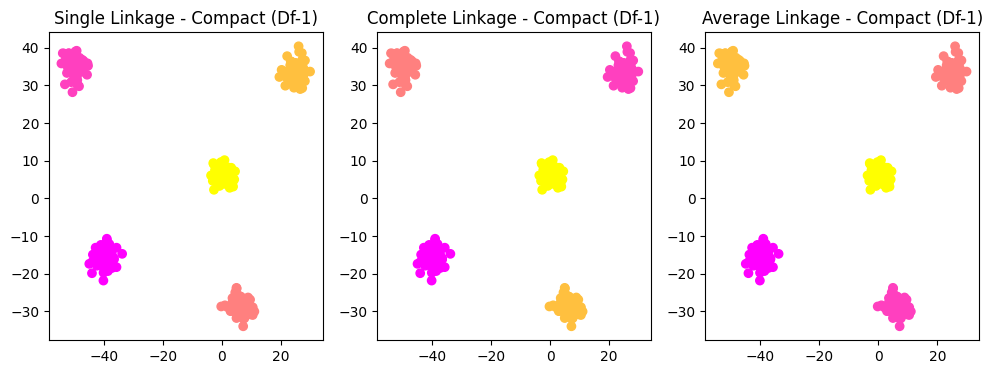

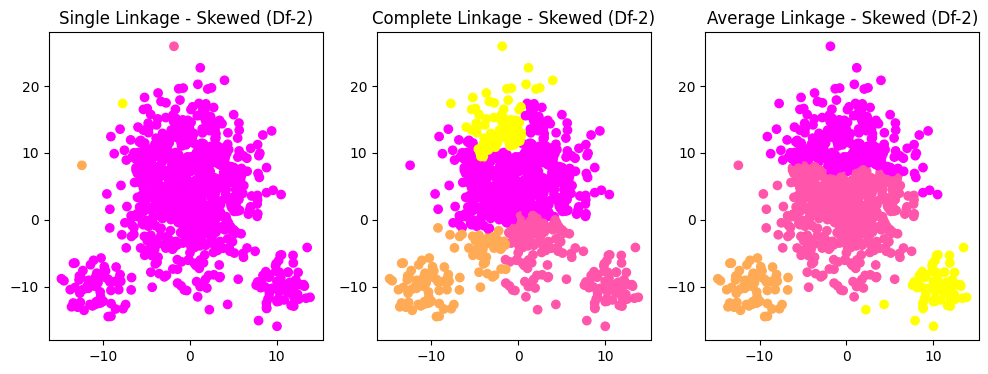

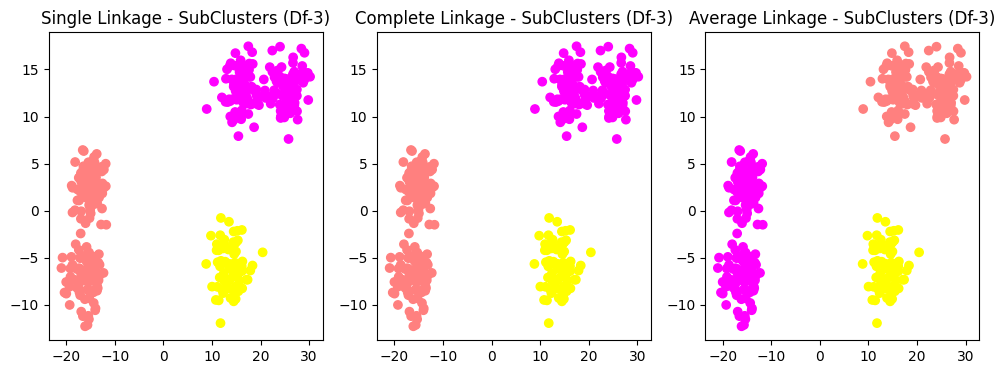

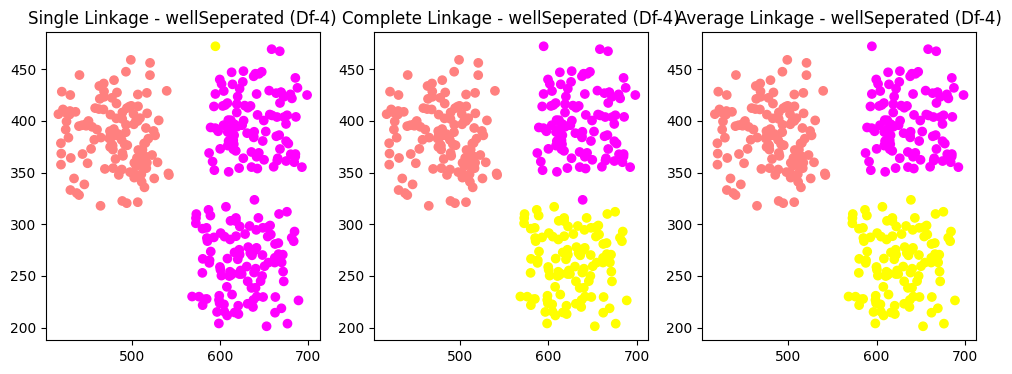

Single Linkage Silhouette Scores: [0.911779955803382, 0.17377870220439787, 0.738949032645643, 0.3468035326554438]
Complete Linkage Silhouette Scores: [0.911779955803382, 0.2927512545050931, 0.738949032645643, 0.6126319460923842]
Average Linkage Silhouette Scores: [0.911779955803382, 0.39141188033602886, 0.738949032645643, 0.6139458447924039]
Single Linkage Inertia: [590396.2417516368, 79248.03833010861, 151743.5744775173, 3635558.9375446625]
Complete Linkage Inertia: [590396.241751637, 79248.0383301086, 151743.5744775173, 3635558.937544662]
Average Linkage Inertia: [590396.241751637, 79248.0383301086, 151743.57447751734, 3635558.9375446625]


In [70]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# lists to store silhouette scores and inertia for each linkage method
single_linkage_scores = []
complete_linkage_scores = []
average_linkage_scores = []

single_linkage_inertia = []
complete_linkage_inertia = []
average_linkage_inertia = []

# Iterate through each dataset
for index, df in enumerate(datasets, start=1):
    # Set up AC models for each linkage type
    single_linkage = AgglomerativeClustering(n_clusters=optimal_cluster_counts[index - 1], linkage='single')
    complete_linkage = AgglomerativeClustering(n_clusters=optimal_cluster_counts[index - 1], linkage='complete')
    average_linkage = AgglomerativeClustering(n_clusters=optimal_cluster_counts[index - 1], linkage='average')

    single_linkage.fit(df)
    complete_linkage.fit(df)
    average_linkage.fit(df)

    # Calculate silhouette scores
    single_score = silhouette_score(df, single_linkage.labels_)
    complete_score = silhouette_score(df, complete_linkage.labels_)
    average_score = silhouette_score(df, average_linkage.labels_)

    # Calculate inertia (sum of squared distances to the cluster center)
    single_inertia = np.sum([np.sum((df.iloc[single_linkage.labels_ == label] - df.mean())**2) 
                             for label in set(single_linkage.labels_) if label != -1])
    
    complete_inertia = np.sum([np.sum((df.iloc[complete_linkage.labels_ == label] - df.mean())**2) 
                               for label in set(complete_linkage.labels_) if label != -1])
    
    average_inertia = np.sum([np.sum((df.iloc[average_linkage.labels_ == label] - df.mean())**2) 
                              for label in set(average_linkage.labels_) if label != -1])

    # Append silhouette scores and inertia values
    single_linkage_scores.append(single_score)
    complete_linkage_scores.append(complete_score)
    average_linkage_scores.append(average_score)

    single_linkage_inertia.append(single_inertia)
    complete_linkage_inertia.append(complete_inertia)
    average_linkage_inertia.append(average_inertia)

    # Plot the clustering results for each linkage type in subplots
    plt.figure(figsize=(12, 4))

    # Plot Single Linkage
    plt.subplot(131)
    plt.scatter(df['x1'], df['x2'], c=single_linkage.labels_, cmap='spring')
    plt.title(f'Single Linkage - {df_names[index - 1]} (Df-{index})')

    # Plot Complete Linkage
    plt.subplot(132)
    plt.scatter(df['x1'], df['x2'], c=complete_linkage.labels_, cmap='spring')
    plt.title(f'Complete Linkage - {df_names[index - 1]} (Df-{index})')

    # Plot Average Linkage
    plt.subplot(133)
    plt.scatter(df['x1'], df['x2'], c=average_linkage.labels_, cmap='spring')
    plt.title(f'Average Linkage - {df_names[index - 1]} (Df-{index})')

    # Display the plots
    plt.show()

# After processing all datasets, print or analyze the silhouette scores and inertia values
print("Single Linkage Silhouette Scores:", single_linkage_scores)
print("Complete Linkage Silhouette Scores:", complete_linkage_scores)
print("Average Linkage Silhouette Scores:", average_linkage_scores)

print("Single Linkage Inertia:", single_linkage_inertia)
print("Complete Linkage Inertia:", complete_linkage_inertia)
print("Average Linkage Inertia:", average_linkage_inertia)



- **Compact Data:**  
This method is particularly effective when using complete or average linkage, as these strategies focus on the maximum or average distance between clusters, respectively.

- **Skewed Data:**  
Similar to KMeans, it faces challenges when dealing with skewed clusters, where the structure of the data is uneven.

- **Subcluster Data:**  
Performs well when the linkage method takes into account the average or complete distance between clusters, especially in datasets with subclusters.

- **Well-Separated Data:**  
Ideal for datasets with well-separated clusters, particularly when using single or complete linkage. 

## DBSCAN

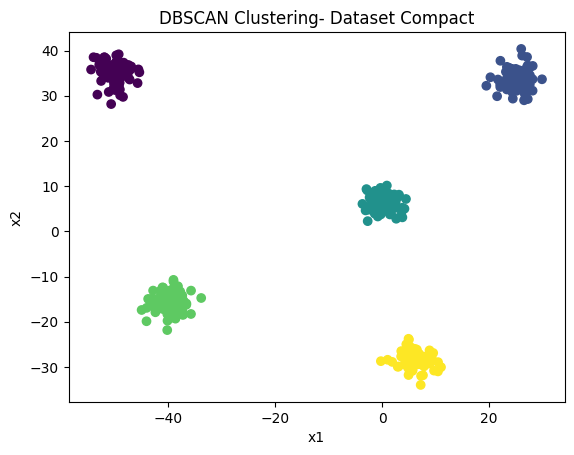

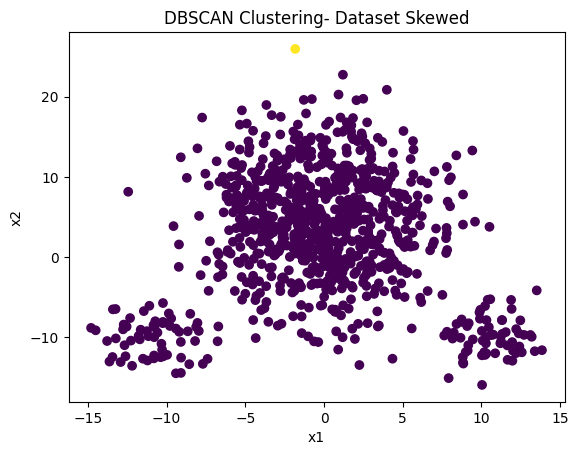

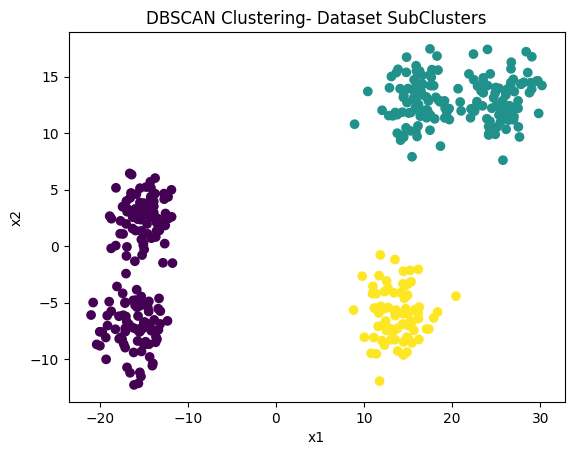

In [83]:
datas=[df1,df2,df3]
dbscan_silhouette_scores=[]
for idx,data in enumerate(datas,1):
    eps_values = np.linspace(1,5,20 )
    min_samples_values = range(1, 51)
    
    best_eps = 0
    best_min_samples = 0
    best_silhouette_score = -1
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            if n_clusters > 1:
                silhouette = silhouette_score(data, labels)
                
                if silhouette > best_silhouette_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_silhouette_score = silhouette

    
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan.fit(data)
    dbscan_silhouette_scores.append(best_silhouette_score)
    plt.scatter(data['x1'], data['x2'], c=dbscan.labels_)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'DBSCAN Clustering- Dataset {df_names[idx-1]}')
    plt.show()
    

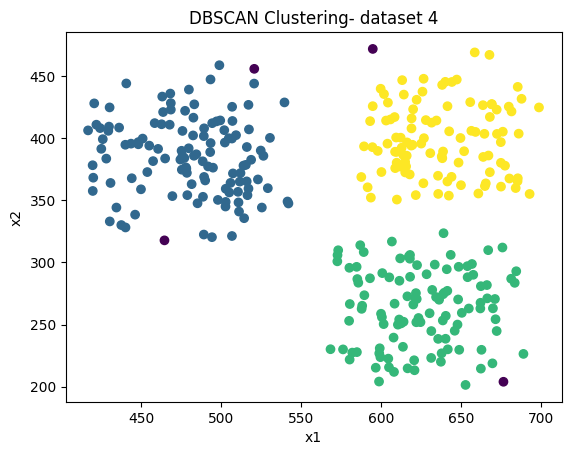

In [84]:
eps_values = np.linspace(1, 29,5)
min_samples_values = range(1, 51)

best_eps = 0
best_min_samples = 0
best_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df4)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters > 1:
            silhouette = silhouette_score(df4, labels)
            
            if silhouette > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette_score = silhouette

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df4)
dbscan_silhouette_scores.append(best_silhouette_score)
plt.scatter(df4['x1'], df4['x2'], c=dbscan.labels_)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'DBSCAN Clustering- dataset 4')
plt.show()


- **Compact Data**: Works well as the compact clusters have consistent densities.

- **Skewed Data**: Works well and the algorithm can handle skewed clusters better than KMeans, as it doesn't assume any specific shape.

- **SubClusters Data**:  Performs well as subclusters have sufficient density, and parameter tuning is crucial.

- **wellSeperated** : May not be the best choice for well-separated clusters but the density of points within each cluster is sufficient so it's working well. Tuning parameters is crucial.

In [85]:
silhouette_data = {
    'Dataset': [f'{df_names[i-1]}' for i in range(1, len(df_names)+1)],
    'K-Means': silhouette_scores,
    'Agg. Single': single_linkage_scores,
    'Agg. Complete': complete_linkage_scores,
    'Agg. Average': average_linkage_scores,
    'DBSCAN':dbscan_silhouette_scores
}
silhouette_scores_df = pd.DataFrame(silhouette_data)

print(silhouette_scores_df)


         Dataset   K-Means  Agg. Single  Agg. Complete  Agg. Average    DBSCAN
0        Compact  0.911780     0.911780       0.911780      0.911780  0.911780
1         Skewed  0.406510     0.173779       0.292751      0.391412  0.483642
2    SubClusters  0.738949     0.738949       0.738949      0.738949  0.738949
3  wellSeperated  0.613946     0.346804       0.612632      0.613946  0.588947


## Sum of intra cluster distances

In [87]:
data = {
    'Dataset': df_names,
    'K-Means': silhouette_scores,
    'Agg. Single': single_linkage_scores,
    'Agg. Complete': complete_linkage_scores,
    'Agg. Average': average_linkage_scores,
    'K-Means Inertia': inertia_scores,
    'Agg. Single Inertia': single_linkage_inertia,
    'Agg. Complete Inertia': complete_linkage_inertia,
    'Agg. Average Inertia': average_linkage_inertia
}

# Create DataFrame and print the results
silhouette_inertia_df = pd.DataFrame(data)
print(silhouette_inertia_df)

         Dataset   K-Means  Agg. Single  Agg. Complete  Agg. Average  \
0        Compact  0.911780     0.911780       0.911780      0.911780   
1         Skewed  0.406510     0.173779       0.292751      0.391412   
2    SubClusters  0.738949     0.738949       0.738949      0.738949   
3  wellSeperated  0.613946     0.346804       0.612632      0.613946   

   K-Means Inertia  Agg. Single Inertia  Agg. Complete Inertia  \
0      3163.693808         5.903962e+05           5.903962e+05   
1     20328.527705         7.924804e+04           7.924804e+04   
2     10795.396187         1.517436e+05           1.517436e+05   
3    629926.614046         3.635559e+06           3.635559e+06   

   Agg. Average Inertia  
0          5.903962e+05  
1          7.924804e+04  
2          1.517436e+05  
3          3.635559e+06  
